In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv('weather_data_danang.csv')
data.head()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,showers,snow_depth,weather_code,cloud_cover,wind_speed_10m
0,2024-01-01T00:00,23.0,89,21.1,1015.0,0.0,0.0,0.0,3,98,3.3
1,2024-01-01T01:00,22.5,92,21.0,1014.7,0.0,0.0,0.0,3,100,1.8
2,2024-01-01T02:00,22.4,92,21.0,1014.0,0.1,0.0,0.0,51,100,2.1
3,2024-01-01T03:00,22.6,90,20.9,1013.6,0.1,0.0,0.0,51,100,2.4
4,2024-01-01T04:00,22.5,90,20.8,1013.4,0.1,0.0,0.0,51,98,3.4


STT,Tên cột,Ý nghĩa,Đơn vị thường dùng

1,time,Thời gian ghi nhận dữ liệu,ISO 8601 (Ngày/Giờ)

2,temperature_2m, Nhiệt độ không khí tại độ cao 2m so với mặt đất,°C hoặc °F

3,relative_humidity_2m, Độ ẩm tương đối (lượng hơi nước hiện có so với mức bão hòa),%

4,dew_point_2m, Điểm sương (nhiệt độ mà tại đó hơi nước ngưng tụ thành nước),°C hoặc °F

5,surface_pressure, Áp suất khí quyển tại bề mặt,hPa hoặc mbar

6,rain,     "Lượng mưa ổn định (diện rộng, kéo dài)",mm

7,showers,  "Mưa rào (mưa cục bộ, cường độ mạnh, nhanh)",mm

8,snow_depth,   Độ dày lớp tuyết bao phủ trên mặt đất,cm hoặc m

9,weather_code, Mã trạng thái thời tiết (Theo chuẩn WMO),Số nguyên (Integer)

10,cloud_cover, Tổng lượng mây che phủ bầu trời,%

11,wind_speed_10m,  Tốc độ gió tại độ cao tiêu chuẩn 10m,km/h hoặc m/s

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17568 entries, 0 to 17567
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  17568 non-null  object 
 1   temperature_2m        17568 non-null  float64
 2   relative_humidity_2m  17568 non-null  int64  
 3   dew_point_2m          17568 non-null  float64
 4   surface_pressure      17568 non-null  float64
 5   rain                  17568 non-null  float64
 6   showers               17568 non-null  float64
 7   snow_depth            17568 non-null  float64
 8   weather_code          17568 non-null  int64  
 9   cloud_cover           17568 non-null  int64  
 10  wind_speed_10m        17568 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 1.5+ MB


In [49]:
data.describe()

,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,showers,snow_depth,weather_code,cloud_cover,wind_speed_10m
count,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.0,17568.0,17568.000000,17568.000000,17568.000000
mean,26.352061,81.302880,22.628159,1009.072319,0.305112,0.0,0.0,19.389970,77.918659,9.189908
std,3.946278,12.618542,2.612477,5.516109,1.237938,0.0,0.0,24.366604,32.862582,5.740632
min,16.100000,31.000000,11.000000,987.200000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,23.500000,74.000000,20.900000,1004.800000,0.000000,0.0,0.0,2.000000,60.000000,4.700000
50%,26.100000,85.000000,23.400000,1008.800000,0.000000,0.0,0.0,3.000000,99.000000,8.000000
75%,28.800000,91.000000,24.600000,1013.400000,0.100000,0.0,0.0,51.000000,100.000000,12.600000
max,40.200000,100.000000,28.500000,1025.100000,41.900000,0.0,0.0,65.000000,100.000000,56.500000


In [50]:
data = data.drop(columns=['showers', 'snow_depth'])

In [51]:
for i in range(len(data.columns)):
    print(f"{data.columns[i]}: {data[data.columns[i]].value_counts()}")

time: time
2024-01-01T00:00    1
2024-01-01T01:00    1
2024-01-01T02:00    1
2024-01-01T03:00    1
2024-01-01T04:00    1
                   ..
2026-01-01T19:00    1
2026-01-01T20:00    1
2026-01-01T21:00    1
2026-01-01T22:00    1
2026-01-01T23:00    1
Name: count, Length: 17568, dtype: int64
temperature_2m: temperature_2m
25.5    307
25.0    299
27.0    295
24.5    288
26.0    270
       ... 
39.2      1
39.9      1
38.7      1
40.2      1
38.4      1
Name: count, Length: 233, dtype: int64
relative_humidity_2m: relative_humidity_2m
93    830
94    821
91    811
92    796
90    792
     ... 
34      4
33      3
31      2
35      1
32      1
Name: count, Length: 70, dtype: int64
dew_point_2m: dew_point_2m
24.5    546
25.0    532
24.0    530
23.5    435
24.6    419
       ... 
28.3      1
13.7      1
11.0      1
12.8      1
11.8      1
Name: count, Length: 163, dtype: int64
surface_pressure: surface_pressure
1004.5    136
1006.2    133
1006.4    132
1004.7    132
1004.8    132
         .

In [52]:
for i in range(len(data.columns)):
    print(f"{data.columns[i]}: {data[data.columns[i]].unique()}")

time: ['2024-01-01T00:00' '2024-01-01T01:00' '2024-01-01T02:00' ...
 '2026-01-01T21:00' '2026-01-01T22:00' '2026-01-01T23:00']
temperature_2m: [23.  22.5 22.4 22.6 22.9 21.6 23.5 23.9 24.8 25.2 25.3 25.1 24.7 24.2
 23.4 22.7 23.1 22.8 23.2 23.8 24.  24.5 23.3 21.9 21.5 22.3 24.9 23.6
 22.1 22.  21.8 21.  21.1 20.8 20.9 20.6 21.4 24.3 25.  24.4 22.2 21.2
 20.4 19.9 19.3 19.8 19.6 21.7 20.7 23.7 24.1 24.6 21.3 20.1 20.  19.5
 18.8 19.  20.2 25.6 25.9 25.8 25.4 25.5 20.5 19.7 19.4 19.2 19.1 18.9
 18.4 18.1 17.6 20.3 18.7 26.3 26.2 26.  26.1 26.6 26.8 26.5 27.4 27.
 26.4 26.9 26.7 27.2 27.1 27.5 28.4 28.1 27.8 28.  28.5 28.6 27.7 25.7
 27.9 27.6 29.8 31.8 32.  31.1 28.9 28.7 31.7 33.5 33.7 33.  30.5 29.2
 28.3 27.3 28.8 28.2 29.  29.4 29.5 29.1 29.3 30.  30.1 30.3 29.7 30.7
 31.6 32.6 32.7 32.3 31.5 30.8 29.9 30.6 34.3 31.9 31.2 30.2 32.8 34.
 29.6 31.  32.5 32.2 31.4 32.1 31.3 30.4 30.9 32.4 33.8 34.5 33.6 32.9
 35.7 33.3 33.2 35.2 34.6 33.9 36.1 36.5 37.9 38.3 37.1 36.  34.8 34.2
 33.1 3

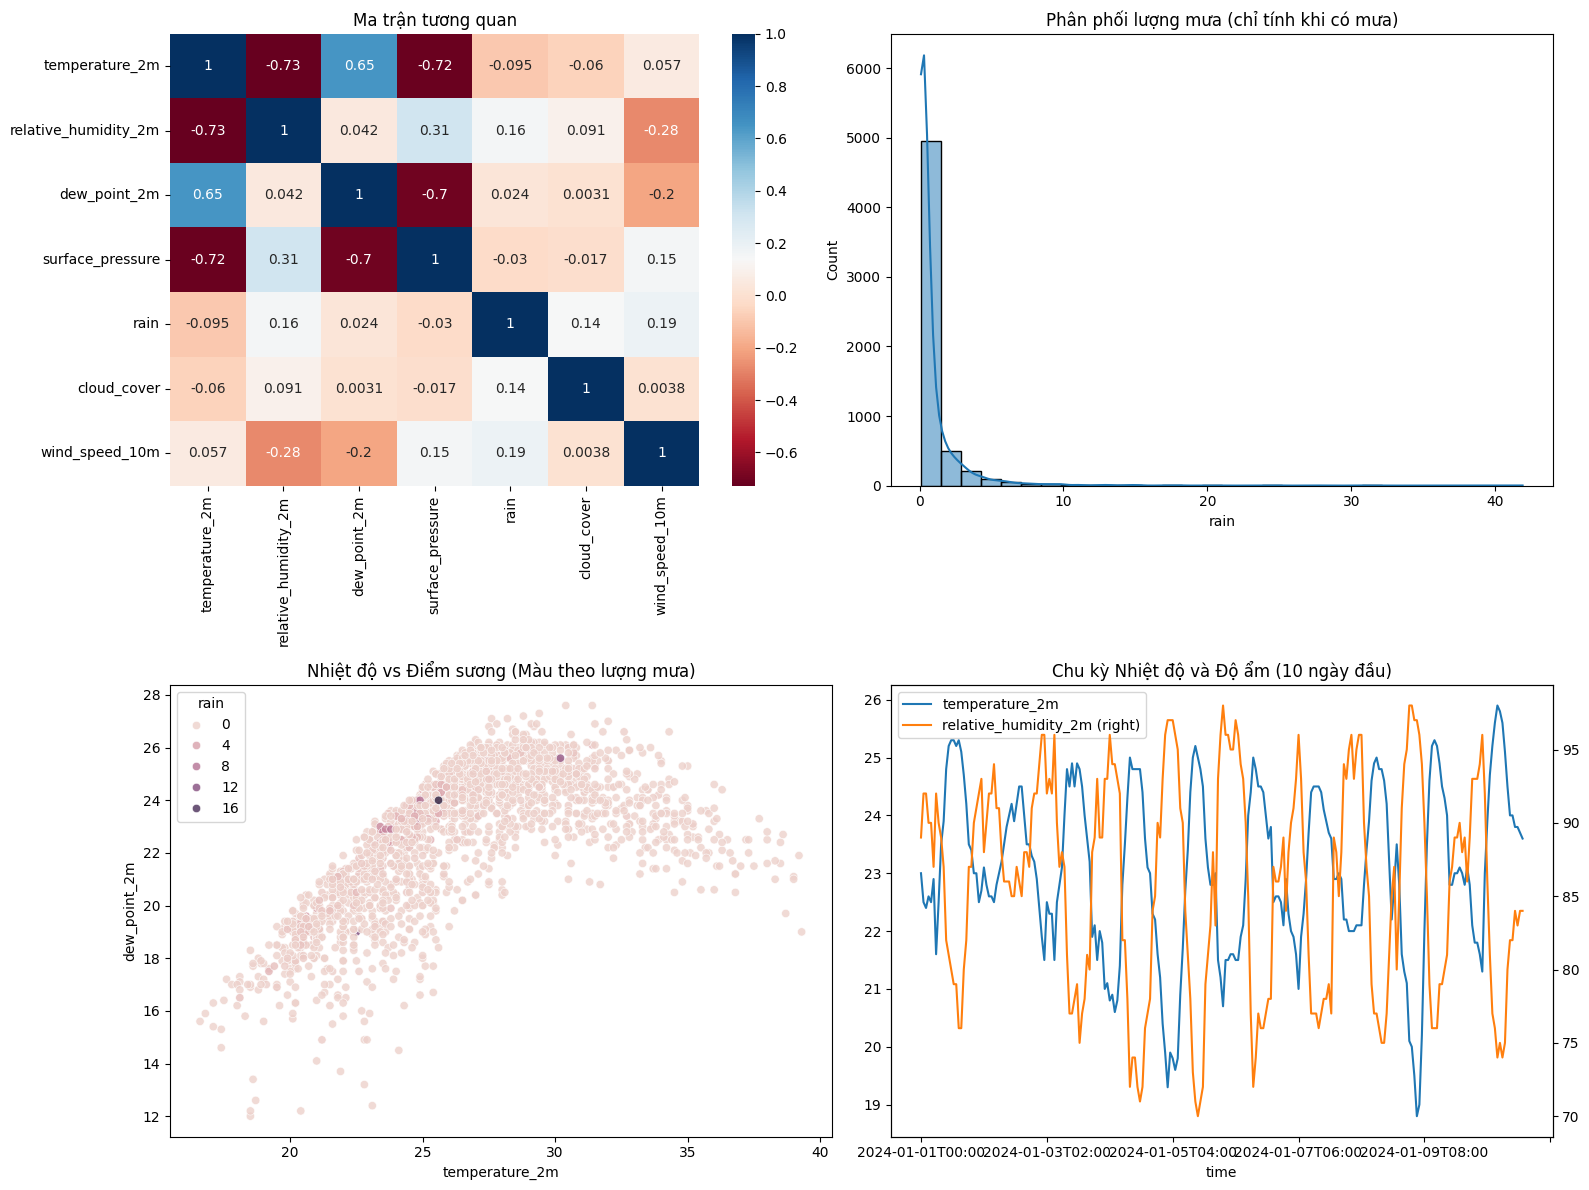

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

cols_to_viz = ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'surface_pressure', 'rain', 'cloud_cover', 'wind_speed_10m']
sns.heatmap(data[cols_to_viz].corr(), annot=True, cmap='RdBu', ax=axes[0,0])
axes[0,0].set_title("Ma trận tương quan")

sns.histplot(data[data['rain'] > 0]['rain'], bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("Phân phối lượng mưa (chỉ tính khi có mưa)")

# 3. Quan hệ Temp vs Dew Point
sns.scatterplot(data=data.sample(2000), x='temperature_2m', y='dew_point_2m', hue='rain', ax=axes[1,0], alpha=0.8)
axes[1,0].set_title("Nhiệt độ vs Điểm sương (Màu theo lượng mưa)")

data[:240].plot(x='time', y=['temperature_2m', 'relative_humidity_2m'], secondary_y='relative_humidity_2m', ax=axes[1,1])
axes[1,1].set_title("Chu kỳ Nhiệt độ và Độ ẩm (10 ngày đầu)")

plt.tight_layout()
plt.show()

In [54]:
data['weather_code'].value_counts()

weather_code
3     7187
51    3705
0     1871
1     1453
2     1160
53     887
61     518
63     455
55     250
65      82
Name: count, dtype: int64

In [55]:
data.groupby('weather_code')['rain'].mean()

weather_code
0      0.000000
1      0.000000
2      0.000000
3      0.000000
51     0.187530
53     0.656257
55     1.094400
61     1.775676
63     3.978462
65    13.167073
Name: rain, dtype: float64

In [56]:
def group_weather(code):
    if code <= 3: return 'Cloudy'
    if code <= 55: return 'Drizzle'
    if code <= 65: return 'Rain'

data['weather_group'] = data['weather_code'].apply(group_weather)

In [57]:
data['weather_group'].value_counts()

weather_group
Cloudy     11671
Drizzle     4842
Rain        1055
Name: count, dtype: int64

In [58]:
# 1. Chuẩn hóa: Chuyển đổi, làm tròn giờ, xóa trùng và sắp xếp
data['time'] = pd.to_datetime(data['time']).dt.floor('H')
data = data.drop_duplicates('time').sort_values('time').reset_index(drop=True)

# 2. Kiểm tra: Tạo khung chuẩn và tìm điểm thiếu
expected_range = pd.date_range(start=data['time'].min(), end=data['time'].max(), freq='H')
missing_times = expected_range.difference(data['time'])

# Kết quả
print(f"Số lượng giờ thiếu: {len(missing_times)}")
print(f"Khớp hoàn toàn: {missing_times.empty}")
if not missing_times.empty:
    print("Các giờ thiếu đầu tiên:", missing_times[:5])

Số lượng giờ thiếu: 0
Khớp hoàn toàn: True


C:\Users\Danh\AppData\Local\Temp\ipykernel_4788\692943736.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['time'] = pd.to_datetime(data['time']).dt.floor('H')
C:\Users\Danh\AppData\Local\Temp\ipykernel_4788\692943736.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  expected_range = pd.date_range(start=data['time'].min(), end=data['time'].max(), freq='H')


Feature Engineering

In [59]:
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['time'].dt.hour
data['month'] = data['time'].dt.month

In [60]:
data['hour_sin'] = np.sin(2*np.pi*data['hour']/24)
data['hour_cos'] = np.cos(2*np.pi*data['hour']/24)
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

data['humidity_change'] = data['relative_humidity_2m'].diff(1)
#Biến động áp suất trong 6 giờ (nhận diện bão xa)
data['pressure_trend_6h'] = data['surface_pressure'].diff(6)
data['press_std_12h'] = data['surface_pressure'].rolling(window=12).std()
# Độ ẩm cực đại 6h (dấu hiệu tích tụ mây)
data['hum_max_6h'] = data['relative_humidity_2m'].rolling(window=6).max()
# Biến động nhiệt độ 3h
data['temp_diff_3h'] = data['temperature_2m'].diff(3)
for col in ['relative_humidity_2m']:
    data[f'{col}_lag1'] = data[col].shift(1)
    data[f'{col}_lag2'] = data[col].shift(2)

In [61]:
data.dropna(inplace=True)

In [62]:
cols_to_drop = [
    'hour', 'month',
    'relative_humidity_2m_lag1', 'relative_humidity_2m_lag2',
    'time', 'rain', 'weather_code'
]
data = data.drop(columns=cols_to_drop)

In [63]:
data.describe()

,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,cloud_cover,wind_speed_10m,hour_sin,hour_cos,month_sin,month_cos,humidity_change,pressure_trend_6h,press_std_12h,hum_max_6h,temp_diff_3h
count,17557.000000,17557.000000,17557.000000,17557.000000,17557.000000,17557.000000,17557.000000,1.755700e+04,1.755700e+04,1.755700e+04,17557.000000,17557.000000,17557.000000,17557.000000,17557.000000
mean,26.354206,81.298001,22.629174,1009.068730,77.906590,9.193120,-0.000418,-1.119739e-04,-3.815701e-03,-1.042940e-03,0.000399,-0.000006,1.192606,86.921285,-0.000473
std,3.946529,12.620792,2.612960,5.515912,32.869108,5.740752,0.707109,7.071444e-01,7.057762e-01,7.084641e-01,3.880983,2.318676,0.347394,9.867888,1.860852
min,16.100000,31.000000,11.000000,987.200000,0.000000,0.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-28.000000,-9.100000,0.264432,41.000000,-7.000000
25%,23.500000,74.000000,20.900000,1004.800000,60.000000,4.700000,-0.707107,-7.071068e-01,-8.660254e-01,-8.660254e-01,-2.000000,-1.800000,0.944321,82.000000,-1.100000
50%,26.100000,85.000000,23.400000,1008.800000,99.000000,8.000000,0.000000,-1.836970e-16,-2.449294e-16,-1.836970e-16,0.000000,0.000000,1.166450,90.000000,-0.400000
75%,28.800000,91.000000,24.600000,1013.400000,100.000000,12.600000,0.707107,7.071068e-01,5.000000e-01,8.660254e-01,2.000000,1.900000,1.404835,94.000000,0.600000
max,40.200000,100.000000,28.500000,1025.100000,100.000000,56.500000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,31.000000,7.500000,4.668333,100.000000,9.200000


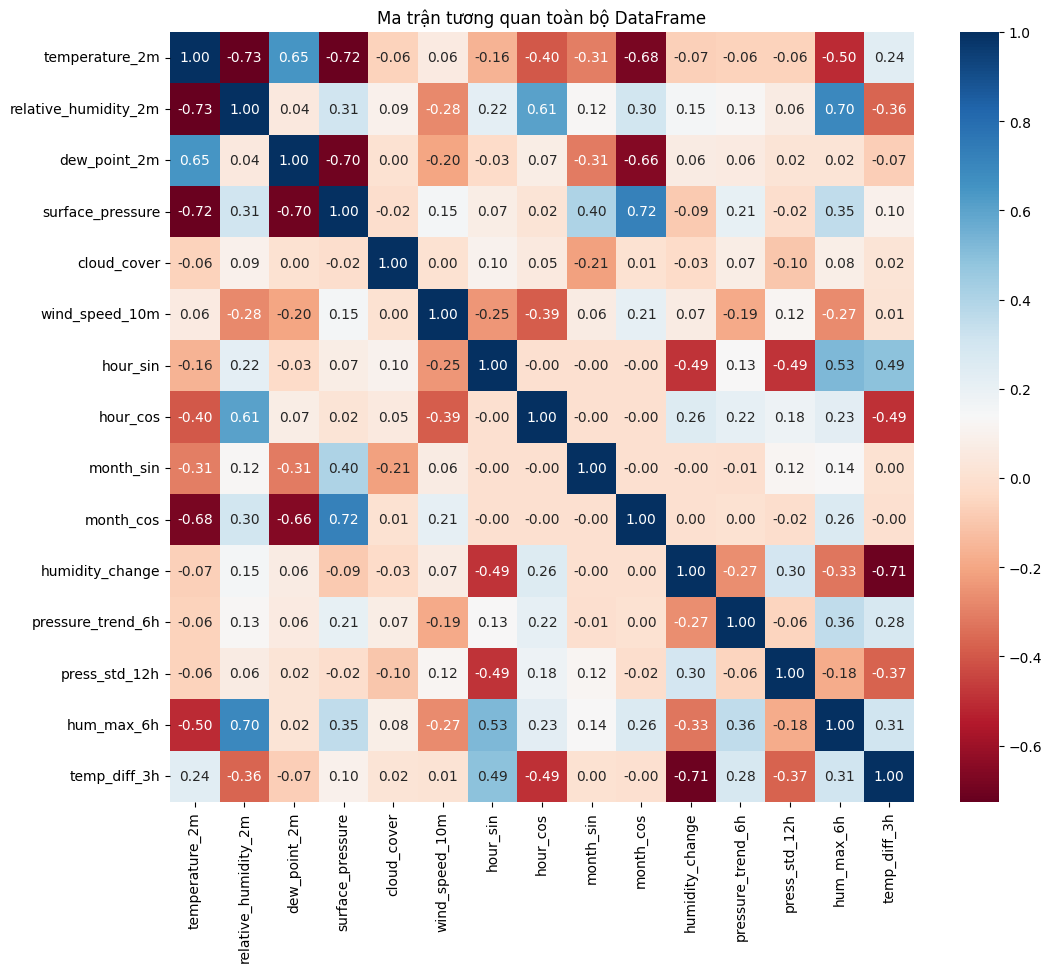

In [64]:
# Tạo figure
plt.figure(figsize=(12, 10))
dr = data.drop(columns=['weather_group'])
# Vẽ heatmap cho tất cả các cột
sns.heatmap(dr.corr(), annot=True, cmap='RdBu', fmt=".2f")

# Tiêu đề
plt.title("Ma trận tương quan toàn bộ DataFrame")

# Hiển thị
plt.show()


In [65]:
data.to_csv('preprocessed_data.csv', index=False)